# Scraping Facebook for the candidates

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
from selenium import webdriver
import datetime as dt  
import numpy as np
from dotenv import load_dotenv
load_dotenv()
import os
import json
pd.set_option('display.max_colwidth', -1)

api_key = os.getenv("GMAP_API")
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

# Michael Bennet

In [2]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/michaelbennet/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if 'APR' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])
divs

[['MAY',
  '31',
  'Meet & Greet with Sen. Michael Bennet',
  'Fri 6:00 PM EDT ',
  ' 7 guests',
  '836 Kilbourne Rd, Columbia, SC 29205-2050, United States'],
 ['MAY',
  '5',
  'House Party with Sen. Michael Bennet',
  'Sun 5:30 PM CDT ',
  ' 9 guests',
  '2510 NE 12th Ct, Ankeny, IA 50021-7441, United States'],
 ['APR',
  '7',
  'Meet Sen. Michael Bennet in Dover',
  'Sun 5:00 PM EDT ',
  ' 12 guests',
  '7 Fieldstone Drive, Dover']]

In [3]:
divs_list = []
for div in divs:
    if len(div) > 5 :
        divs_list.append(div)

In [4]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address']=chunk[5]+", "+chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "Michael Bennet"
    event_dict.append(event)

In [5]:
bennet_df = pd.DataFrame(event_dict)
bennet_df.Event_Date = pd.to_datetime(bennet_df.Event_Date, format="%b %d", errors='coerce')
bennet_df.Event_Date = bennet_df.Event_Date.dt.strftime("%m/%d/2019")
bennet_df.Event_Crowd = bennet_df.Event_Crowd.str.extract("^(.*)\sguests")

In [6]:
bennet_df

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"836 Kilbourne Rd, Columbia, SC 29205-2050, United States",7,05/31/2019,Meet & Greet with Sen. Michael Bennet,Michael Bennet
1,"2510 NE 12th Ct, Ankeny, IA 50021-7441, United States",9,05/05/2019,House Party with Sen. Michael Bennet,Michael Bennet
2,"7 Fieldstone Drive, Dover",12,04/07/2019,Meet Sen. Michael Bennet in Dover,Michael Bennet


In [7]:
## Dropping everything before the announcement date
bennet_df.drop(bennet_df.tail(1).index,inplace=True)

In [8]:
bennet_df.shape

(2, 5)

# Joe Biden Jr.

In [9]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/joebiden/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if 'APR' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])
divs

[['JUL',
  '6',
  'Sumter, SC: Community Event with Joe Biden',
  'Sat 2:00 PM CDT ',
  ' 3 guests',
  'M.H. Newton Family Life Enrichment Center 415 Manning Ave. Sumter, SC 29150'],
 ['JUL',
  '6',
  'Orangeburg, SC: Community Event with Joe Biden',
  'Sat 5:30 PM EDT ',
  ' 12 guests',
  'Edisto Fork United Methodist Church 356 Lariot Road Orangeburg, SC 29115'],
 ['JUL',
  '7',
  'Charleston, SC: Town Hall with Joe Biden and State Sen. Marlon K',
  'Sun 2:30 PM EDT ',
  ' Hosted by Joe Biden',
  'International Longshoremen’s Association Hall 1142 Morrison Dr Charleston, SC 29403'],
 ['JUL',
  '4',
  'Marshalltown, IA: Community Event with Joe and Jill Biden',
  'Thu 1:00 PM CDT ',
  ' 89 guests',
  'Best Western Regency Inn',
  'Marshalltown, IA'],
 ['JUL',
  '4',
  'March with Joe Biden in the Independence 4th of July Pa',
  'Thu 8:00 AM EDT ',
  ' 19 guests',
  '209 5th Ave. NE Independence, IA 50644'],
 ['JUL',
  '3',
  'Waterloo, IA: Community Event with Joe and Jill Biden',
  '

In [10]:
divs_list = []
for div in divs:
    if len(div) > 5:
        divs_list.append(div)

In [11]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address']=chunk[5]+", "+chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "Joe Biden Jr."
    event_dict.append(event)

In [12]:
biden_df = pd.DataFrame(event_dict)
biden_df.Event_Date = pd.to_datetime(biden_df.Event_Date, format="%b %d", errors='coerce')
biden_df.Event_Date = biden_df.Event_Date.dt.strftime("%m/%d/2019")
biden_df.Event_Crowd = biden_df.Event_Crowd.str.extract("^(.*)\sguests")

In [13]:
biden_df.head()

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"M.H. Newton Family Life Enrichment Center 415 Manning Ave. Sumter, SC 29150",3,07/06/2019,"Sumter, SC: Community Event with Joe Biden",Joe Biden Jr.
1,"Edisto Fork United Methodist Church 356 Lariot Road Orangeburg, SC 29115",12,07/06/2019,"Orangeburg, SC: Community Event with Joe Biden",Joe Biden Jr.
2,"International Longshoremen’s Association Hall 1142 Morrison Dr Charleston, SC 29403",NaN,07/07/2019,"Charleston, SC: Town Hall with Joe Biden and State Sen. Marlon K",Joe Biden Jr.
3,"Best Western Regency Inn, Marshalltown, IA",89,07/04/2019,"Marshalltown, IA: Community Event with Joe and Jill Biden",Joe Biden Jr.
4,"209 5th Ave. NE Independence, IA 50644",19,07/04/2019,March with Joe Biden in the Independence 4th of July Pa,Joe Biden Jr.


In [14]:
## Dropping everything before the announcement date
# biden_df.drop(biden_df.tail(1).index,inplace=True)

In [15]:
biden_df.shape

(33, 5)

In [16]:
df2 = bennet_df.append(biden_df, ignore_index=True)

In [17]:
df2.shape

(35, 5)

# Cory Booker

In [18]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/corybooker/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if '2012 State of the City Address' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])
divs

[['JUL',
  '12',
  'Boston Grassroots Happy Hour',
  'Fri 6:30 PM EDT ',
  ' 392 guests',
  'Boston, Massachusetts',
  'Boston, MA'],
 ['JUL',
  '15',
  'Chicago Grassroots Happy Hour',
  'Mon 7:00 PM CDT ',
  ' 395 guests',
  'Chicago, Illinois',
  'Chicago, IL'],
 ['JUL',
  '17',
  'DC Grassroots Happy Hour',
  'Wed 6:00 PM EDT ',
  ' 1,287 guests',
  '1445 New York Ave NW, Washington, DC 20005-2134, United States'],
 ['JUN',
  '5',
  'Atlanta, GA—Grassroots Fundraiser for Cory',
  'Wed 7:30 PM EDT ',
  ' 730 guests',
  'Atlanta, Georgia',
  'Atlanta, GA'],
 ['MAY',
  '13',
  'Conversation with Cory and Congresswoman Annie Kuster in Concord',
  'Mon 11:00 AM EDT ',
  ' 331 guests'],
 ['MAY',
  '12',
  'Conversation with Cory in Berlin',
  'Sun 4:30 PM EDT ',
  ' 24 guests',
  'Berlin City Hall, 168 Main Street, Berlin, NH 03570'],
 ['MAY',
  '11',
  'Orangeburg, SC—Office Opening with Cory',
  'Sat 9:00 AM EDT ',
  ' 107 guests',
  '920 Russell St, Orangeburg, SC 29115-5876, United S

In [19]:
divs_list = []
for div in divs:
    if len(div) > 5:
        divs_list.append(div)

In [20]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address']=chunk[5]+", "+chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "Cory Booker"
    event_dict.append(event)

In [21]:
booker_df = pd.DataFrame(event_dict)
booker_df.Event_Date = pd.to_datetime(booker_df.Event_Date, format="%b %d", errors='coerce')
booker_df.Event_Date = booker_df.Event_Date.dt.strftime("%m/%d/2019")
booker_df.Event_Crowd = booker_df.Event_Crowd.str.extract("^(.*)\sguests")

In [22]:
booker_df.head()

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"Boston, Massachusetts, Boston, MA",392,07/12/2019,Boston Grassroots Happy Hour,Cory Booker
1,"Chicago, Illinois, Chicago, IL",395,07/15/2019,Chicago Grassroots Happy Hour,Cory Booker
2,"1445 New York Ave NW, Washington, DC 20005-2134, United States","1,287",07/17/2019,DC Grassroots Happy Hour,Cory Booker
3,"Atlanta, Georgia, Atlanta, GA",730,06/05/2019,"Atlanta, GA—Grassroots Fundraiser for Cory",Cory Booker
4,"Berlin City Hall, 168 Main Street, Berlin, NH 03570",24,05/12/2019,Conversation with Cory in Berlin,Cory Booker


In [23]:
## Dropping everything before the announcement date
# biden_df.drop(biden_df.tail(1).index,inplace=True)

In [24]:
booker_df.shape

(50, 5)

In [25]:
df2 = df2.append(booker_df, ignore_index=True)

In [26]:
df2.shape

(85, 5)

In [27]:
df2['properties.name'].value_counts()

Cory Booker       50
Joe Biden Jr.     33
Michael Bennet    2 
Name: properties.name, dtype: int64

# Steve Bullock

In [28]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/GovernorBullock/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if 'APR' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])

In [29]:
divs_list = []
for div in divs:
    if len(div) > 5:
        divs_list.append(div)

In [30]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address']=chunk[5]+", "+chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "Steve Bullock"
    event_dict.append(event)

In [31]:
bullock_df = pd.DataFrame(event_dict)
bullock_df.Event_Date = pd.to_datetime(bullock_df.Event_Date, format="%b %d", errors='coerce')
bullock_df.Event_Date = bullock_df.Event_Date.dt.strftime("%m/%d/2019")
bullock_df.Event_Crowd = bullock_df.Event_Crowd.str.extract("^(.*)\sguests")

In [32]:
bullock_df.head()

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"Tremont Inn On Main, Marshalltown, IA",8,07/10/2019,A Fair Shot for Marshalltown with Steve Bullock,Steve Bullock
1,"SingleSpeed Brewing Co. (Waterloo, IA), Waterloo, IA",15,07/10/2019,A Fair Shot for Waterloo with Steve Bullock,Steve Bullock
2,"LaReyna, Vinton, IA",6,07/10/2019,A Fair Shot for Vinton with Steve Bullock,Steve Bullock
3,"Blackstone, Iowa City, IA",20,07/10/2019,A Fair Shot for Iowa City with Steve Bullock,Steve Bullock
4,"100 S Commercial St, Manchester, NH 03101-2605, United States",98,06/27/2019,WMUR Town Hall with Governor Steve Bullock,Steve Bullock


In [33]:
## Dropping everything before the announcement date
bullock_df.drop(bullock_df.tail(5).index,inplace=True)

In [34]:
bullock_df.shape

(24, 5)

In [35]:
df2 = df2.append(bullock_df, ignore_index=True)

In [36]:
df2.shape

(109, 5)

In [37]:
df2['properties.name'].value_counts()

Cory Booker       50
Joe Biden Jr.     33
Steve Bullock     24
Michael Bennet    2 
Name: properties.name, dtype: int64

# Pete Buttigieg

In [38]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/petebuttigieg1/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if 'MAR' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])
divs

[['JUL',
  '3',
  'Meet Pete in Sioux City!',
  'Wed 4:00 PM CDT ',
  ' 842 guests',
  'Sioux City North High School',
  'Sioux City, IA'],
 ['JUN',
  '22',
  'Town Hall in North Augusta',
  'Sat 5:00 PM EDT ',
  ' 1,027 guests',
  'Maude Edenfield Park',
  'North Augusta, SC'],
 ['JUN',
  '9',
  'Cedar Rapids Picnic with Pete!',
  'Sun 11:00 AM EDT ',
  ' 329 guests',
  'Greene Square Park 372-480 4th Ave SE Cedar Rapids, IA 52401'],
 ['MAY',
  '25',
  'Town Hall with Pete Buttigieg',
  'Sat 11:00 AM EDT ',
  ' 897 guests',
  'Keene High School',
  'Keene, NH'],
 ['MAY',
  '18',
  'Meet Pete in Dubuque!',
  'Sat 3:30 PM CDT ',
  ' 652 guests',
  '7 Hills Brewing Company Event Center 1085 Washington St Dubuque, IA 52001'],
 ['MAY',
  '18',
  'Meet Pete in Johnson County!',
  'Sat 12:30 PM CDT ',
  ' 1,408 guests',
  'Wildwood Smokehouse & Saloon Walleye Dr SE, Iowa City, IA 52240'],
 ['MAY',
  '6',
  'Meet and Greet in Orangeburg',
  'Mon 12:30 PM EDT ',
  ' 352 guests',
  '1005 Brough

In [39]:
divs_list = []
for div in divs:
    if len(div) > 5:
        divs_list.append(div)

In [40]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address']=chunk[5]+", "+chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "Pete Buttigieg"
    event_dict.append(event)

In [41]:
buttigieg_df = pd.DataFrame(event_dict)
buttigieg_df.Event_Date = pd.to_datetime(buttigieg_df.Event_Date, format="%b %d", errors='coerce')
buttigieg_df.Event_Date = buttigieg_df.Event_Date.dt.strftime("%m/%d/2019")
buttigieg_df.Event_Crowd = buttigieg_df.Event_Crowd.str.extract("^(.*)\sguests")

In [42]:
buttigieg_df.head()

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"Sioux City North High School, Sioux City, IA",842,07/03/2019,Meet Pete in Sioux City!,Pete Buttigieg
1,"Maude Edenfield Park, North Augusta, SC","1,027",06/22/2019,Town Hall in North Augusta,Pete Buttigieg
2,"Greene Square Park 372-480 4th Ave SE Cedar Rapids, IA 52401",329,06/09/2019,Cedar Rapids Picnic with Pete!,Pete Buttigieg
3,"Keene High School, Keene, NH",897,05/25/2019,Town Hall with Pete Buttigieg,Pete Buttigieg
4,"7 Hills Brewing Company Event Center 1085 Washington St Dubuque, IA 52001",652,05/18/2019,Meet Pete in Dubuque!,Pete Buttigieg


In [43]:
## Dropping everything before the announcement date
buttigieg_df.drop(buttigieg_df.tail(2).index,inplace=True)

In [44]:
buttigieg_df.shape

(10, 5)

In [45]:
df2 = df2.append(buttigieg_df, ignore_index=True)

In [46]:
df2['properties.name'].value_counts()

Cory Booker       50
Joe Biden Jr.     33
Steve Bullock     24
Pete Buttigieg    10
Michael Bennet    2 
Name: properties.name, dtype: int64

# Julian Castro

In [47]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/julianforthefuture/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if 'Julián Castro | An Unlikely Journey' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])
divs

[['JUL',
  '7',
  'Meet Julián Castro in Council Bluffs, IA',
  'Sun 7:00 PM CDT ',
  ' 428 guests',
  '1900 Madison Ave, Council Bluffs, IA 51503-5250, United States'],
 ['JUL',
  '8',
  'Meet Julián Castro in Red Oak, IA',
  'Mon 8:30 AM CDT ',
  ' 202 guests',
  'The Bridge Coffeehouse',
  'Red Oak, IA'],
 ['JUL',
  '1',
  'Road to 2020: Julián Castro',
  'Mon 6:00 PM CDT ',
  ' 2,148 guests',
  'La Gran Plaza de Fort Worth',
  'Fort Worth, TX'],
 ['JUL',
  '1',
  'Frisco Democratic Club Town Hall with Sec. Julian Castro',
  'Mon 12:30 PM CDT ',
  ' 754 guests',
  'Collin College, Preston Ridge Campus',
  'Frisco, TX'],
 ['JUN',
  '30',
  'HCDP Presidential Candidate Speaker Series with Julián Castro',
  'Sun 2:00 PM CDT ',
  ' 1,905 guests',
  "St. John's Downtown",
  'Houston, TX'],
 ['JUN',
  '29',
  'March with Julián at SA Pride Parade!',
  'Sat 8:30 PM CDT ',
  ' 446 guests',
  'Lewis St. between Dewey Place and Ashby Place'],
 ['JUN',
  '29',
  'Castro2020 Pre-Pride Happy Hou

In [48]:
divs_list = []
for div in divs:
    if len(div) > 5:
        divs_list.append(div)

In [49]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address']=chunk[5]+", "+chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "Julian Castro"
    event_dict.append(event)

In [50]:
castro_df = pd.DataFrame(event_dict)
castro_df.Event_Date = pd.to_datetime(castro_df.Event_Date, format="%b %d", errors='coerce')
castro_df.Event_Date = castro_df.Event_Date.dt.strftime("%m/%d/2019")
castro_df.Event_Crowd = castro_df.Event_Crowd.str.extract("^(.*)\sguests")

In [51]:
castro_df.head()

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"1900 Madison Ave, Council Bluffs, IA 51503-5250, United States",428,07/07/2019,"Meet Julián Castro in Council Bluffs, IA",Julian Castro
1,"The Bridge Coffeehouse, Red Oak, IA",202,07/08/2019,"Meet Julián Castro in Red Oak, IA",Julian Castro
2,"La Gran Plaza de Fort Worth, Fort Worth, TX","2,148",07/01/2019,Road to 2020: Julián Castro,Julian Castro
3,"Collin College, Preston Ridge Campus, Frisco, TX",754,07/01/2019,Frisco Democratic Club Town Hall with Sec. Julian Castro,Julian Castro
4,"St. John's Downtown, Houston, TX","1,905",06/30/2019,HCDP Presidential Candidate Speaker Series with Julián Castro,Julian Castro


In [52]:
## Dropping everything before the announcement date
castro_df.drop(castro_df.tail(2).index,inplace=True)

In [53]:
castro_df.shape

(56, 5)

In [54]:
df2 = df2.append(castro_df, ignore_index=True)

In [55]:
df2['properties.name'].value_counts()

Julian Castro     56
Cory Booker       50
Joe Biden Jr.     33
Steve Bullock     24
Pete Buttigieg    10
Michael Bennet    2 
Name: properties.name, dtype: int64

# John K. Delaney

In [56]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/JohnKDelaneyJKD/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if 'Rally to Save Health Care' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])
divs

[['JUL',
  '4',
  'Independence Day BBQ with John Delaney!',
  'Thu 2:00 PM EDT ',
  ' 23 guests',
  '39 Foxwood Cir, Manchester, NH 03104-4139, United States'],
 ['JUL',
  '4',
  'Brentwood Barbecue with John Delaney!',
  'Thu 12:00 PM EDT ',
  ' 206 guests',
  '52 Stevens Dr, Brentwood, NH 03833-6400, United States'],
 ['JUL',
  '3',
  'Ice Cream Social with John',
  'Wed 8:00 PM EDT ',
  ' 75 guests',
  "Moo's Place Ice Cream (Derry, NH)",
  'Derry, NH'],
 ['JUL',
  '3',
  'Climate Action Town Hall with John Delaney',
  'Wed 5:30 PM EDT ',
  ' 19 guests',
  'Durham Unitarian Universalist Fellowship',
  'Durham, NH'],
 ['JUL',
  '3',
  'Pancake Breakfast with John Delaney',
  'Wed 8:00 AM EDT ',
  ' 10 guests',
  '21 Main St, Jaffrey, NH 03452-6187, United States'],
 ['JUL',
  '2',
  'Keene Meet and Greet with John Delaney',
  'Tue 6:30 PM EDT ',
  ' 22 guests',
  'Keene Public Library',
  'Keene, NH'],
 ['JUL',
  '2',
  'Nashua Town Hall with John Delaney',
  'Tue 12:00 PM EDT ',
  

In [57]:
divs_list = []
for div in divs:
    if len(div) > 5:
        divs_list.append(div)

In [58]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address']=chunk[5]+", "+chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "John K. Delaney"
    event_dict.append(event)

In [59]:
delaney_df = pd.DataFrame(event_dict)
delaney_df.Event_Date = pd.to_datetime(delaney_df.Event_Date, format="%b %d", errors='coerce')
delaney_df.Event_Date = delaney_df.Event_Date.dt.strftime("%m/%d/2019")
delaney_df.Event_Crowd = delaney_df.Event_Crowd.str.extract("^(.*)\sguests")

In [60]:
delaney_df.head()

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"39 Foxwood Cir, Manchester, NH 03104-4139, United States",23,07/04/2019,Independence Day BBQ with John Delaney!,John K. Delaney
1,"52 Stevens Dr, Brentwood, NH 03833-6400, United States",206,07/04/2019,Brentwood Barbecue with John Delaney!,John K. Delaney
2,"Moo's Place Ice Cream (Derry, NH), Derry, NH",75,07/03/2019,Ice Cream Social with John,John K. Delaney
3,"Durham Unitarian Universalist Fellowship, Durham, NH",19,07/03/2019,Climate Action Town Hall with John Delaney,John K. Delaney
4,"21 Main St, Jaffrey, NH 03452-6187, United States",10,07/03/2019,Pancake Breakfast with John Delaney,John K. Delaney


In [61]:
## Dropping everything before the announcement date
delaney_df.drop(delaney_df.tail(3).index,inplace=True)

In [62]:
delaney_df.shape

(118, 5)

In [63]:
df2 = df2.append(delaney_df, ignore_index=True)

In [64]:
df2['properties.name'].value_counts()

John K. Delaney    118
Julian Castro      56 
Cory Booker        50 
Joe Biden Jr.      33 
Steve Bullock      24 
Pete Buttigieg     10 
Michael Bennet     2  
Name: properties.name, dtype: int64

# Tulsi Gabbard

In [65]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/TulsiGabbard/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if '4th Annual Brews and BBQ ' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])
divs

[['JUL',
  '5',
  'Haverhill Meet and Greet',
  'Fri 11:00 AM EDT ',
  ' 23 guests',
  '122 School St, Haverhill, NH 03765-5439, United States'],
 ['JUL',
  '5',
  'Lancaster Meet and Greet',
  'Fri 2:00 PM EDT ',
  ' 274 guests',
  'The Granite Grind',
  'Lancaster, NH'],
 ['JUL',
  '5',
  'Littleton Town Hall',
  'Fri 6:00 PM EDT ',
  ' 86 guests',
  'Littleton Opera House',
  'Littleton, NH'],
 ['JUL',
  '6',
  'Franconia Olde Home Day 5k Run w/ Tulsi',
  'Sat 8:30 AM EDT ',
  ' 10 guests',
  'Dow Academy',
  'Franconia, NH'],
 ['JUL',
  '6',
  'Franconia Independence Day Parade',
  'Sat 12:15 PM EDT ',
  ' 15 guests',
  'Franconia, NH'],
 ['JUL',
  '6',
  'Bradford Independence Day Parade',
  'Sat 3:30 PM EDT ',
  ' 19 guests',
  'Bradford, NH'],
 ['JUL',
  '7',
  'Goffstown Meet and Greet',
  'Sun 11:00 AM EDT ',
  ' 38 guests',
  'Apotheca Flower and Tea Shoppe',
  'Goffstown, NH'],
 ['JUL',
  '7',
  'Milford Meet and Greet',
  'Sun 2:00 PM EDT ',
  ' 51 guests',
  'Milford Commu

In [66]:
divs_list = []
for div in divs:
    if len(div) > 5:
        divs_list.append(div)

In [67]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address']=chunk[5]+", "+chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "Tulsi Gabbard"
    event_dict.append(event)

In [68]:
gabbard_df = pd.DataFrame(event_dict)
gabbard_df.Event_Date = pd.to_datetime(gabbard_df.Event_Date, format="%b %d", errors='coerce')
gabbard_df.Event_Date = gabbard_df.Event_Date.dt.strftime("%m/%d/2019")
gabbard_df.Event_Crowd = gabbard_df.Event_Crowd.str.extract("^(.*)\sguests")

In [69]:
gabbard_df.head()

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"122 School St, Haverhill, NH 03765-5439, United States",23,07/05/2019,Haverhill Meet and Greet,Tulsi Gabbard
1,"The Granite Grind, Lancaster, NH",274,07/05/2019,Lancaster Meet and Greet,Tulsi Gabbard
2,"Littleton Opera House, Littleton, NH",86,07/05/2019,Littleton Town Hall,Tulsi Gabbard
3,"Dow Academy, Franconia, NH",10,07/06/2019,Franconia Olde Home Day 5k Run w/ Tulsi,Tulsi Gabbard
4,"Franconia, NH",15,07/06/2019,Franconia Independence Day Parade,Tulsi Gabbard


In [70]:
## Dropping everything before the announcement date
gabbard_df.drop(gabbard_df.tail(1).index,inplace=True)

In [71]:
gabbard_df.shape

(70, 5)

In [72]:
df2 = df2.append(gabbard_df, ignore_index=True)

In [73]:
df2['properties.name'].value_counts()

John K. Delaney    118
Tulsi Gabbard      70 
Julian Castro      56 
Cory Booker        50 
Joe Biden Jr.      33 
Steve Bullock      24 
Pete Buttigieg     10 
Michael Bennet     2  
Name: properties.name, dtype: int64

# Kirsten E. Gillibrand

In [74]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/KirstenGillibrand/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if 'Porstmouth Roundtable with Kirsten' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])
divs

[['JUL',
  '7',
  'Democracy Town Hall with Kirsten Gillibrand',
  'Sun 4:30 PM EDT ',
  ' 207 guests',
  '3S Artspace',
  'Portsmouth, NH'],
 ['JUN',
  '27',
  'Debate Watch Party for Kirsten at Blazing Saddle!',
  'Thu 8:00 PM CDT ',
  ' 42 guests'],
 ['JUN',
  '27',
  'Hometown Shero: Troy Debate Watch Party',
  'Thu 8:15 PM EDT ',
  ' 129 guests',
  'Superior Merchandise Company',
  'Troy, NY'],
 ['JUN',
  '8',
  'Join Kirsten Gillibrand at the 2020 Book Club!',
  'Sat 9:00 AM CDT ',
  ' 65 guests',
  'Wellmark YMCA',
  'Des Moines, IA'],
 ['JUN',
  '7',
  'Join Kirsten Gillibrand at Blazing Saddle!',
  'Fri 7:00 PM CDT ',
  ' 202 guests'],
 ['MAY',
  '25',
  'Waterloo Meet & Greet',
  'Sat 6:30 PM CDT ',
  ' 226 guests',
  'Locals Bar',
  'Waterloo, IA'],
 ['MAY',
  '25',
  'Charles City Meet & Greet',
  'Sat 2:00 PM CDT ',
  ' 15 guests',
  '101 Main St, Charles City, IA 50616-2733, United States'],
 ['MAY',
  '25',
  'Mason City Meet & Greet',
  'Sat 12:00 PM CDT ',
  ' 90 guest

In [75]:
divs_list = []
for div in divs:
    if len(div) > 5:
        divs_list.append(div)

In [76]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address']=chunk[5]+", "+chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "Kirsten E. Gillibrand"
    event_dict.append(event)

In [77]:
gillibrand_df = pd.DataFrame(event_dict)
gillibrand_df.Event_Date = pd.to_datetime(gillibrand_df.Event_Date, format="%b %d", errors='coerce')
gillibrand_df.Event_Date = gillibrand_df.Event_Date.dt.strftime("%m/%d/2019")
gillibrand_df.Event_Crowd = gillibrand_df.Event_Crowd.str.extract("^(.*)\sguests")

In [78]:
gillibrand_df.head()

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"3S Artspace, Portsmouth, NH",207,07/07/2019,Democracy Town Hall with Kirsten Gillibrand,Kirsten E. Gillibrand
1,"Superior Merchandise Company, Troy, NY",129,06/27/2019,Hometown Shero: Troy Debate Watch Party,Kirsten E. Gillibrand
2,"Wellmark YMCA, Des Moines, IA",65,06/08/2019,Join Kirsten Gillibrand at the 2020 Book Club!,Kirsten E. Gillibrand
3,"Locals Bar, Waterloo, IA",226,05/25/2019,Waterloo Meet & Greet,Kirsten E. Gillibrand
4,"101 Main St, Charles City, IA 50616-2733, United States",15,05/25/2019,Charles City Meet & Greet,Kirsten E. Gillibrand


In [79]:
## Dropping everything before the announcement date
gillibrand_df.drop(gillibrand_df.tail(1).index,inplace=True)

In [80]:
gillibrand_df.shape

(33, 5)

In [81]:
df2 = df2.append(gillibrand_df, ignore_index=True)

In [82]:
df2['properties.name'].value_counts()

John K. Delaney          118
Tulsi Gabbard            70 
Julian Castro            56 
Cory Booker              50 
Kirsten E. Gillibrand    33 
Joe Biden Jr.            33 
Steve Bullock            24 
Pete Buttigieg           10 
Michael Bennet           2  
Name: properties.name, dtype: int64

# Beto O'Rourke

In [83]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/betoorourke/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if 'FEB' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])

In [84]:
divs_list = []
for div in divs:
    if len(div) > 5:
        divs_list.append(div)

In [85]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address'] = chunk[5] + ", " + chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "Beto O'Rourke"
    event_dict.append(event)

In [86]:
beto_df = pd.DataFrame(event_dict)
beto_df.Event_Date = pd.to_datetime(beto_df.Event_Date, format="%b %d", errors='coerce')
beto_df.Event_Date = beto_df.Event_Date.dt.strftime("%m/%d/2019")
beto_df.Event_Crowd = beto_df.Event_Crowd.str.extract("^(.*)\sguests")

In [87]:
beto_df.head()

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"Marathon Music Works, Nashville, TN",782,07/07/2019,Nashville Rally with Beto,Beto O'Rourke
1,"655 Maple St, Manchester, NH 03104-3785, United States",170,07/13/2019,Manchester Dems: Picnic in Oak Park with Beto,Beto O'Rourke
2,"311 Spruce St, Williams, IA 50271-7649, United States",193,07/04/2019,Williams House Party with Beto and Amy,Beto O'Rourke
3,"209 5th Ave NE, Independence, IA 50644-1955, United States",343,07/04/2019,March with Beto and Amy in the Annual Independence Day Parade,Beto O'Rourke
4,"1360 487th St, St Ansgar, IA 50472-8514, United States",193,07/03/2019,St. Ansgar House Party with Beto & Amy O'Rourke,Beto O'Rourke


In [88]:
## Dropping everything before the announcement date
beto_df.drop(beto_df.tail(1).index,inplace=True)

In [89]:
beto_df.shape

(126, 5)

In [90]:
df2 = df2.append(beto_df, ignore_index=True)

In [91]:
df2['properties.name'].value_counts()

Beto O'Rourke            126
John K. Delaney          118
Tulsi Gabbard            70 
Julian Castro            56 
Cory Booker              50 
Kirsten E. Gillibrand    33 
Joe Biden Jr.            33 
Steve Bullock            24 
Pete Buttigieg           10 
Michael Bennet           2  
Name: properties.name, dtype: int64

# Elizabeth Warren

In [92]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/ElizabethWarren/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if 'DEC' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nPagesPublic FigureElizabeth WarrenEvents\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])

In [93]:
divs_list = []
for div in divs:
    if len(div) > 5:
        divs_list.append(div)

In [94]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address'] = chunk[5] + ", " + chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "Elizabeth Warren"
    
    event_dict.append(event)

In [95]:
warren_df = pd.DataFrame(event_dict)
warren_df.Event_Date = pd.to_datetime(warren_df.Event_Date, format="%b %d", errors='coerce')
warren_df.Event_Date = warren_df.Event_Date.dt.strftime("%m/%d/2019")
warren_df.Event_Crowd = warren_df.Event_Crowd.str.extract("^(.*)\sguests")

In [96]:
warren_df.head()

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"Student Centers- University of Houston, Houston, TX","3,110",07/05/2019,Houston Town Hall with Elizabeth Warren,Elizabeth Warren
1,Peterborough Town House,546,07/08/2019,Peterborough Town Hall with Elizabeth Warren,Elizabeth Warren
2,"Cathexes, LLC, Reno, NV",308,07/03/2019,Reno Community Conversation with Elizabeth Warren,Elizabeth Warren
3,"East Las Vegas Community Center, Las Vegas, NV",343,07/02/2019,East Las Vegas Community Conversation with Elizabeth Warren,Elizabeth Warren
4,"Newton, Massachusetts, Newton, MA","1,071",07/01/2019,Team Warren Organizing Meeting with Rep. Joe Kennedy III,Elizabeth Warren


In [97]:
## Dropping everything before the announcement date
warren_df.drop(warren_df.tail(4).index,inplace=True)

In [98]:
df2 = df2.append(warren_df, ignore_index=True)

In [99]:
df2['properties.name'].value_counts()

Beto O'Rourke            126
John K. Delaney          118
Elizabeth Warren         116
Tulsi Gabbard            70 
Julian Castro            56 
Cory Booker              50 
Kirsten E. Gillibrand    33 
Joe Biden Jr.            33 
Steve Bullock            24 
Pete Buttigieg           10 
Michael Bennet           2  
Name: properties.name, dtype: int64

# Bernie Sanders

In [100]:
driver = webdriver.Chrome()
driver.get("https://www.facebook.com/pg/berniesanders/events/?ref=page_internal")

while driver.find_element_by_tag_name("div"):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    divs=driver.find_element_by_xpath('//*[@id="content_container"]/div').text
    if 'JAN' in divs:
        break
    else:
        continue
driver.quit()

divs = re.sub(r"\n([A-Z]{3}\n\d?)", r"\n///\1", divs)
divs = divs.split("\n///")
del divs[0]
divs = [tix.replace('\nGet Tickets', "") for tix in divs]
divs = [tix.replace('\nPast Events', "") for tix in divs]
divs = [tix.replace('\nEnglish (US)\nEspañol\nFrançais (France)\n中文(简体)\nالعربية\nPortuguês (Brasil)\nItaliano\n한국어\nDeutsch\nहिन्दी\n日本語\nSign UpLog InMessengerFacebook Lite Watch PeopleProfilesPagesPage CategoriesEventsPlacesGamesLocationsMarketplaceGroupsInstagramLocalFundraisersServicesAboutCreate AdCreate PageDevelopersCareersPrivacyCookiesAd Choices\nTermsAccount SecurityLogin HelpHelp\nSettings\nActivity Log\nFacebook © 2019', "") for tix in divs]

for line in range(0, len(divs)):
    divs[line] = re.split("[\n·]",divs[line])
divs

[['JUL',
  '6',
  'West Las Vegas Town Hall with Bernie Sanders',
  'Sat 11:30 AM PDT ',
  ' 3 guests',
  'Victory Baptist Church',
  'Las Vegas, NV'],
 ['JUL',
  '6',
  'East Las Vegas Office Grand Opening with Bernie Sanders',
  'Sat 4:30 PM PDT ',
  ' 2 guests',
  '5001 E Bonanza Rd, Las Vegas, NV 89110-3514, United States'],
 ['JUL',
  '13',
  'Southeast Las Vegas Barnstorm with Team Bernie',
  'Sat 10:00 AM PDT ',
  ' 240 guests',
  'Black Mountain Rec',
  'Henderson, NV'],
 ['JUL',
  '13',
  'Southwest Vegas Barnstorm with Team Bernie',
  'Sat 2:00 PM PDT ',
  ' 157 guests',
  'Spring Valley Library',
  'Las Vegas, NV'],
 ['JUL',
  '14',
  'Carson City Barnstorm with Team Bernie',
  'Sun 1:00 PM PDT ',
  ' 135 guests',
  'Carson City Community Center',
  'Carson City, NV'],
 ['JUL',
  '4',
  'Pella Independence Day Parade with Bernie Sanders',
  'Thu 6:00 PM CDT ',
  ' 105 guests',
  'Corner East 2nd and Franklin St'],
 ['JUL',
  '4',
  'Windsor Heights Independence Day Parade wi

In [101]:
divs_list = []
for div in divs:
    if len(div) > 5:
        divs_list.append(div)

In [102]:
event_dict = []
for chunk in divs_list:
    event = {}
    event['Event_Date'] = chunk[0] + " " + chunk[1]
    event['Event_Title'] = chunk[2]
    event['Event_Crowd'] = chunk[4]
    try: event['Event_Address']=chunk[5]+", "+chunk[6]
    except: event['Event_Address'] = chunk[5]
    event['properties.name'] = "Bernie Sanders"
    event_dict.append(event)

In [103]:
sanders_df = pd.DataFrame(event_dict)
sanders_df.Event_Date = pd.to_datetime(sanders_df.Event_Date, format="%b %d", errors='coerce')
sanders_df.Event_Date = sanders_df.Event_Date.dt.strftime("%m/%d/2019")
sanders_df.Event_Crowd = sanders_df.Event_Crowd.str.extract("^(.*)\sguests")

In [104]:
sanders_df.head()

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name
0,"Victory Baptist Church, Las Vegas, NV",3,07/06/2019,West Las Vegas Town Hall with Bernie Sanders,Bernie Sanders
1,"5001 E Bonanza Rd, Las Vegas, NV 89110-3514, United States",2,07/06/2019,East Las Vegas Office Grand Opening with Bernie Sanders,Bernie Sanders
2,"Black Mountain Rec, Henderson, NV",240,07/13/2019,Southeast Las Vegas Barnstorm with Team Bernie,Bernie Sanders
3,"Spring Valley Library, Las Vegas, NV",157,07/13/2019,Southwest Vegas Barnstorm with Team Bernie,Bernie Sanders
4,"Carson City Community Center, Carson City, NV",135,07/14/2019,Carson City Barnstorm with Team Bernie,Bernie Sanders


In [105]:
## Dropping everything before the announcement date
sanders_df.drop(sanders_df.tail(12).index,inplace=True)

In [106]:
sanders_df.shape

(346, 5)

In [107]:
df2 = df2.append(sanders_df, ignore_index=True)

In [108]:
df2['properties.name'].value_counts()

Bernie Sanders           346
Beto O'Rourke            126
John K. Delaney          118
Elizabeth Warren         116
Tulsi Gabbard            70 
Julian Castro            56 
Cory Booker              50 
Kirsten E. Gillibrand    33 
Joe Biden Jr.            33 
Steve Bullock            24 
Pete Buttigieg           10 
Michael Bennet           2  
Name: properties.name, dtype: int64

# Merging Candidate info
Scraped from each candidate's C-

In [109]:
df2.shape

(984, 5)

In [110]:
cand_df = pd.read_csv("candidate_info.csv")

In [111]:
merged_df2 = df2.merge(cand_df, right_on='Name', left_on='properties.name')

In [112]:
merged_df2.shape

(984, 10)

# Getting the info ready

In [113]:
# def get_coords(x):
#     try:
#         url = 'https://maps.googleapis.com/maps/api/geocode/json'
#         keys = {'address': x, 'key': api_key}
#         r = requests.get(url,params=keys)
#         result_dic = r.json()
#         return float(result_dic['results'][0]['geometry']['location']['lng']), float(result_dic['results'][0]['geometry']['location']['lat'])
#     except:
#         return np.nan

In [114]:
geometry_df = []
for place in merged_df2['Event_Address']:
    try:
        url = 'https://maps.googleapis.com/maps/api/geocode/json'
        keys = {'address': place, 'key': api_key}
        r = requests.get(url,params=keys)
        result_dic = r.json()
        lat = result_dic['results'][0]['geometry']['location']['lat']
        long = result_dic['results'][0]['geometry']['location']['lng']
        coords = []
        coords.append(float(long))
        coords.append(float(lat))
        mygeometry = {'place': place, 'geometry.type': 'Point','geometry.coordinates': coords}
        geometry_df.append(mygeometry)
    except: pass
geometry_df

[{'place': '836 Kilbourne Rd, Columbia, SC 29205-2050, United States',
  'geometry.type': 'Point',
  'geometry.coordinates': [-80.9859094, 33.9998961]},
 {'place': '2510 NE 12th Ct, Ankeny, IA 50021-7441, United States',
  'geometry.type': 'Point',
  'geometry.coordinates': [-93.5649396, 41.7395946]},
 {'place': 'M.H. Newton Family Life Enrichment Center 415 Manning Ave. Sumter, SC 29150',
  'geometry.type': 'Point',
  'geometry.coordinates': [-80.34026999999999, 33.90585]},
 {'place': 'Edisto Fork United Methodist Church 356 Lariot Road Orangeburg, SC 29115',
  'geometry.type': 'Point',
  'geometry.coordinates': [-80.94124099999999, 33.4598862]},
 {'place': 'International Longshoremen’s Association Hall 1142 Morrison Dr Charleston, SC 29403',
  'geometry.type': 'Point',
  'geometry.coordinates': [-79.9485121, 32.8117674]},
 {'place': 'Best Western Regency Inn, Marshalltown, IA',
  'geometry.type': 'Point',
  'geometry.coordinates': [-92.9138151, 42.0060498]},
 {'place': '209 5th Ave. 

In [115]:
geometry_df = pd.DataFrame(geometry_df)

In [116]:
merged_df2 = merged_df2.merge(geometry_df, left_on='Event_Address', right_on='place')

In [117]:
def prop_ids(x):
    if x['properties.name'] == "Michael Bennet":
        x['properties.color'] = "3bd01fa"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 1
        return x
        
    if x['properties.name'] == "Joe Biden Jr.":
        x['properties.color'] = "#cf4b16"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 2
        return x
    
    if x['properties.name'] == "Cory Booker":
        x['properties.color'] = "#3b36a8"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 3
        return x
    
    if x['properties.name'] == "Steve Bullock":
        x['properties.color'] = "#77cee9"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 4
        return x
    
    if x['properties.name'] == "Pete Buttigieg":
        x['properties.color'] = "#8fd34a"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 5
        return x
    
    if x['properties.name'] == "Julian Castro":
        x['properties.color'] = "#cf53c5"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 6
        return x
    
    if x['properties.name'] == "John K. Delaney":
        x['properties.color'] = "#75a044"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 7
        return x
    
    if x['properties.name'] == "Tulsi Gabbard":
        x['properties.color'] = "#351f46"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 8
        return x
    
    if x['properties.name'] == "Kirsten E. Gillibrand":
        x['properties.color'] = "#c283ec"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 9
        return x
    
    if x['properties.name'] == "Kamala D. Harris":
        x['properties.color'] = "#326223"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 10
        return x
    
    if x['properties.name'] == "John W. Hickenlooper":
        x['properties.color'] = "#2de957"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 11
        return x
    
    if x['properties.name'] == "Jay Inslee":
        x['properties.color'] = "#2ba773"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 12
        return x
    
    if x['properties.name'] == "Amy Klobuchar":
        x['properties.color'] = "#20f75a"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 13
        return x
        
    if x['properties.name'] == "Seth W. Moulton":
        x['properties.color'] = "#67c77d"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 14
        return x
    
    if x['properties.name'] == "Beto O'Rourke":
        x['properties.color'] = "#0bb9b8"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 15
        return x
    
    if x['properties.name'] == "Tim Ryan":
        x['properties.color'] = "#d766d4"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 16
        return x
    
    if x['properties.name'] == "Bernie Sanders":
        x['properties.color'] = "#882d35"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 17
        return x
    
    if x['properties.name'] == "Joe Sestek Jr.":
        x['properties.color'] = "#93aba7"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 18
        return x
        
    if x['properties.name'] == "Eric Swalwell":
        x['properties.color'] = "#1334c3"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 19
        return x
    
    if x['properties.name'] == "Elizabeth Warren":
        x['properties.color'] = "#39c285"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = "Elizabeth Warren"
        x['properties.group_id'] = 20
        return x
            
    if x['properties.name'] == "Marianna Williamson":
        x['properties.color'] = "#cff410"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = "Elizabeth Warren"
        x['properties.group_id'] = 21
        return x
                
    if x['properties.name'] == "Andrew Yang":
        x['properties.color'] = "#45b374"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = "Elizabeth Warren"
        x['properties.group_id'] = 22
        return x

In [118]:
merged_df2 = merged_df2.apply(prop_ids, axis=1)

In [119]:
merged_df2['properties.name'].value_counts()

Bernie Sanders           361
John K. Delaney          133
Beto O'Rourke            130
Elizabeth Warren         121
Tulsi Gabbard            71 
Julian Castro            66 
Cory Booker              55 
Kirsten E. Gillibrand    38 
Joe Biden Jr.            34 
Steve Bullock            31 
Pete Buttigieg           10 
Michael Bennet           2  
Name: properties.name, dtype: int64

In [120]:
# x['properties.color'] = "#9244FF",
# x['properties_color'] = x['properties.color'],
# x['properties.group_name'] = "Elizabeth Warren",
# x['properties.group_id'] = 1;

In [121]:
# merged_df2['properties_color'] = merged_df2['properties.name'].apply(lambda x: prop_color(x))

In [122]:
def prop_headline(x):
    return x

In [123]:
merged_df2['properties.headline'] = merged_df2['Event_Title'].apply(lambda x: prop_headline(x))

In [124]:
def prop_article(row):
    return f"<div id='img><img src="{row.IMG}"></div>\
    <div id='headline'><h2 style='font-family:helvetica;font-size:38px;border-bottom: 5px solid {row.properties_color}'>{row.Event_Title}</h2></div>\
    <p style='font-size:20px;'> Location: {row.Event_Address}</p>\
    <p style='font-size:20px;'> Crowd size: {row.Event_Crowd}</p>"


In [125]:
merged_df2['properties.article'] = merged_df2.apply(prop_article, axis=1)

In [126]:
# def prop_group_name(x):
#     if x == "Elizabeth Warren":
#         return "Elizabeth Warren"
#     if x == "Beto O'Rourke":
#         return "Beto O'Rourke"
#     if x == "Bernie Sanders":
#         return "Bernie Sanders"

In [127]:
# merged_df2['properties.group_name'] = merged_df2['properties.name'].apply(lambda x: prop_group_name(x))

In [128]:
# def prop_group_id(x):
#     if x == "Elizabeth Warren":
#         return 1
#     if x == "Beto O'Rourke":
#         return 2
#     if x == "Bernie Sanders":
#         x

In [129]:
# merged_df2['properties.group_id'] = merged_df2['properties.name'].apply(lambda x: prop_group_id(x))

In [130]:
merged_df2.to_csv("fb_events_info.csv", index=False)

In [131]:
csv_df = pd.read_csv("fb_events_info.csv", thousands=",", usecols=['geometry.coordinates', 'geometry.type', 'properties.name', 'properties.headline', 'properties.article', 'properties.color', 'properties.group_id', 'properties.group_name'])

In [132]:
csv_df['geometry.coordinates'] = csv_df['geometry.coordinates'].apply(json.loads)

In [133]:
csv_df.head()

,properties.name,geometry.coordinates,geometry.type,properties.color,properties.group_name,properties.group_id,properties.headline,properties.article
0,Michael Bennet,"[-80.9859094, 33.9998961]",Point,3bd01fa,Michael Bennet,1,Meet & Greet with Sen. Michael Bennet,"<div id='img><img src=https://images.c-span.org/Files/6de/20190623005652001_hd.jpg/Thumbs/height.200.no_border.width.200.jpg></div> <div id='headline'><h2 style='font-family:helvetica;font-size:38px;border-bottom: 5px solid 3bd01fa'>Meet & Greet with Sen. Michael Bennet</h2></div> <p style='font-size:20px;'> Location: 836 Kilbourne Rd, Columbia, SC 29205-2050, United States</p> <p style='font-size:20px;'> Crowd size: 7</p>"
1,Michael Bennet,"[-93.5649396, 41.7395946]",Point,3bd01fa,Michael Bennet,1,House Party with Sen. Michael Bennet,"<div id='img><img src=https://images.c-span.org/Files/6de/20190623005652001_hd.jpg/Thumbs/height.200.no_border.width.200.jpg></div> <div id='headline'><h2 style='font-family:helvetica;font-size:38px;border-bottom: 5px solid 3bd01fa'>House Party with Sen. Michael Bennet</h2></div> <p style='font-size:20px;'> Location: 2510 NE 12th Ct, Ankeny, IA 50021-7441, United States</p> <p style='font-size:20px;'> Crowd size: 9</p>"
2,Joe Biden Jr.,"[-80.34026999999999, 33.90585]",Point,#cf4b16,Joe Biden Jr.,2,"Sumter, SC: Community Event with Joe Biden","<div id='img><img src=https://images.c-span.org/Files/993/20190624234258001_hd.jpg/Thumbs/height.200.no_border.width.200.jpg></div> <div id='headline'><h2 style='font-family:helvetica;font-size:38px;border-bottom: 5px solid #cf4b16'>Sumter, SC: Community Event with Joe Biden</h2></div> <p style='font-size:20px;'> Location: M.H. Newton Family Life Enrichment Center 415 Manning Ave. Sumter, SC 29150</p> <p style='font-size:20px;'> Crowd size: 3</p>"
3,Joe Biden Jr.,"[-80.94124099999999, 33.4598862]",Point,#cf4b16,Joe Biden Jr.,2,"Orangeburg, SC: Community Event with Joe Biden","<div id='img><img src=https://images.c-span.org/Files/993/20190624234258001_hd.jpg/Thumbs/height.200.no_border.width.200.jpg></div> <div id='headline'><h2 style='font-family:helvetica;font-size:38px;border-bottom: 5px solid #cf4b16'>Orangeburg, SC: Community Event with Joe Biden</h2></div> <p style='font-size:20px;'> Location: Edisto Fork United Methodist Church 356 Lariot Road Orangeburg, SC 29115</p> <p style='font-size:20px;'> Crowd size: 12</p>"
4,Joe Biden Jr.,"[-79.9485121, 32.8117674]",Point,#cf4b16,Joe Biden Jr.,2,"Charleston, SC: Town Hall with Joe Biden and State Sen. Marlon K","<div id='img><img src=https://images.c-span.org/Files/993/20190624234258001_hd.jpg/Thumbs/height.200.no_border.width.200.jpg></div> <div id='headline'><h2 style='font-family:helvetica;font-size:38px;border-bottom: 5px solid #cf4b16'>Charleston, SC: Town Hall with Joe Biden and State Sen. Marlon K</h2></div> <p style='font-size:20px;'> Location: International Longshoremen’s Association Hall 1142 Morrison Dr Charleston, SC 29403</p> <p style='font-size:20px;'> Crowd size: nan</p>"


In [134]:
ok_json = json.loads(csv_df.to_json(orient='records'))

In [135]:
def process_to_geojson(file):
    geo_data = {"type": "FeatureCollection", "features":[]}
    for row in file:
        this_dict = {"type": "Feature", "properties":{}, "geometry": {}}
        for key, value in row.items():
            key_names = key.split('.')
            if key_names[0] == 'geometry':
                this_dict['geometry'][key_names[1]] = value
            if str(key_names[0]) == 'properties':
                this_dict['properties'][key_names[1]] = value
        geo_data['features'].append(this_dict)
    return geo_data


In [136]:
geo_format = process_to_geojson(ok_json)

In [137]:
with open('geo-data.js', 'w') as outfile:
    outfile.write("var infoData = " + json.dumps(geo_format))

In [138]:
merged_df2[merged_df2['properties.name']=="Beto O'Rourke"].sort_values(by='Event_Crowd', ascending=False).head(1)
# .plot(kind='barh', figsize=(12,2), title="Facebook Events per 2020 Dem. Candidate")

,Event_Address,Event_Crowd,Event_Date,Event_Title,properties.name,Name,IMG,Official Bio,Description,Titles,geometry.coordinates,geometry.type,place,properties.color,properties_color,properties.group_name,properties.group_id,properties.headline,properties.article
562,"Tradesman Brewing Company 1647 King St Ext Charleston, SC 29405",973,03/22/2019,Charleston Meet and Greet,Beto O'Rourke,Beto O'Rourke,https://images.c-span.org/Files/bad/20190702194652001_hd.jpg/Thumbs/height.200.no_border.width.200.jpg,"<a href=""http://bioguide.congress.gov/scripts/biodisplay.pl?index=O000170"" target=""_blank"">Official Bio <i class=""icon-new-tab""></i></a>","['Robert Francis ""Beto"" O\'Rourke is an American businessman, musician, and politician of the Democratic Party who represented Texas\'s 16th congressional district for three terms in the United States House of Representatives. Wikipedia*', ""On the C-SPAN Networks:Beto O'Rourke has 189 videos in the C-SPAN Video Library; the first appearance was a 2013 Ceremony. The year with the highest average number of views per program was 2018 with an average of 3,594 views per program. Most appearances with Amy Klobuchar (6), Tim Ryan (6), Sheila Jackson Lee (5). Most common tags: Road to the White House, Election 2020, Immigration.""]","['U.S. Representative, D-TX 16th View Map', 'U.S. Senate Candidate, D-Texas', 'U.S. Representative Candidate, D-16']","[-79.9531552, 32.8220188]",Point,"Tradesman Brewing Company 1647 King St Ext Charleston, SC 29405",#0bb9b8,#0bb9b8,Beto O'Rourke,15,Charleston Meet and Greet,"<div id='img><img src=https://images.c-span.org/Files/bad/20190702194652001_hd.jpg/Thumbs/height.200.no_border.width.200.jpg></div> <div id='headline'><h2 style='font-family:helvetica;font-size:38px;border-bottom: 5px solid #0bb9b8'>Charleston Meet and Greet</h2></div> <p style='font-size:20px;'> Location: Tradesman Brewing Company 1647 King St Ext Charleston, SC 29405</p> <p style='font-size:20px;'> Crowd size: 973</p>"


In [139]:
merged_df2.to_csv("merged_df2.csv", index=False)

In [140]:
df = pd.read_csv("merged_df2.csv", thousands=",")

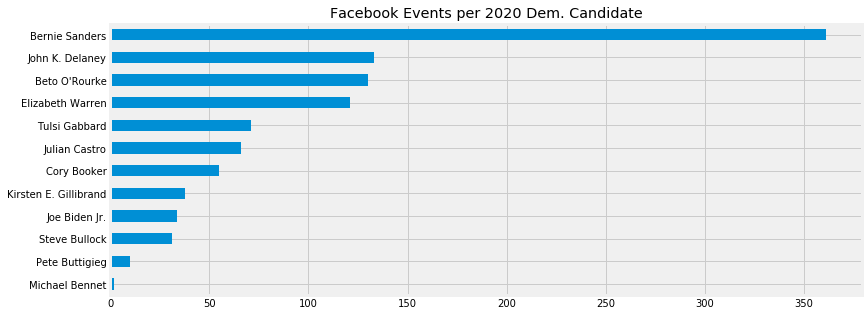

In [141]:
ax = df['properties.name'].value_counts().sort_values().plot(kind='barh',figsize=(12,5), title="Facebook Events per 2020 Dem. Candidate")

[Text(1, 0, '8.0'),
 Text(1, 0, '56.60769230769231'),
 Text(1, 0, '68.38709677419355'),
 Text(1, 0, '117.13157894736842'),
 Text(1, 0, '240.58823529411765'),
 Text(1, 0, '425.92727272727274'),
 Text(1, 0, '484.8181818181818'),
 Text(1, 0, '757.8'),
 Text(1, 0, '793.5757575757576'),
 Text(1, 0, '872.8099173553719'),
 Text(1, 0, '1007.2'),
 Text(1, 0, '4126.819944598338')]

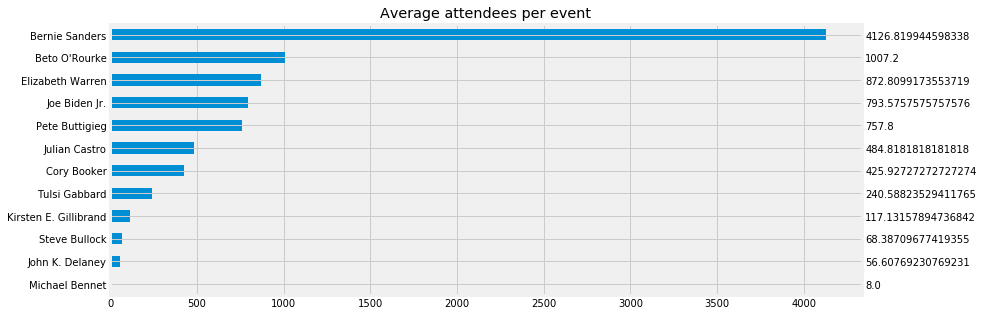

In [142]:
ax = df.groupby(by='properties.name').Event_Crowd.mean()\
    .sort_values().plot(kind='barh', figsize=(12,5), title="Average attendees per event")
ax.set_ylabel('')
alt = ax.twinx()
# Set the new graph to have its tick marks in the same position
alt.set_yticks(ax.yaxis.get_ticklocs()) 
alt.set_ylim(ax.get_ylim())
# Set the labels for the tick marks to be the same, too
alt.set_yticklabels(df.groupby(by='properties.name').Event_Crowd.mean().sort_values())